# Covid-19 Detection using Deep Learning

### DataSet link:  https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')
import os
from tensorflow.keras.utils import Sequence 
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense,Dropout,Input

In [2]:
df = pd.read_csv("D://Capston Project/Chest_xray_Corona_Metadata.csv")

In [3]:
df

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


In [4]:
# train and test destiation
train_file='D://Capston Project/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/'

In [5]:
#converting all image in same size
def convert_format(path):
    import cv2
    from skimage.transform import resize
  #Import image
    image = cv2.imread(path,1)
    image=image/255.0
    resized = resize(image, (128,128))
    return resized

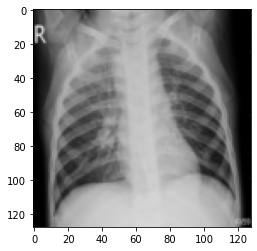

In [6]:
#check random image
plt.imshow(convert_format(train_file+'person605_virus_1166.jpeg'))

In [7]:
#check transform image
convert_format(train_file+'IM-0154-0001.jpeg').shape

(128, 128, 3)

In [8]:
#sample train images
sample_train_images = list(os.walk(train_file))[0][2][:8]
sample_train_images = list(map(lambda x: os.path.join(train_file, x), sample_train_images))

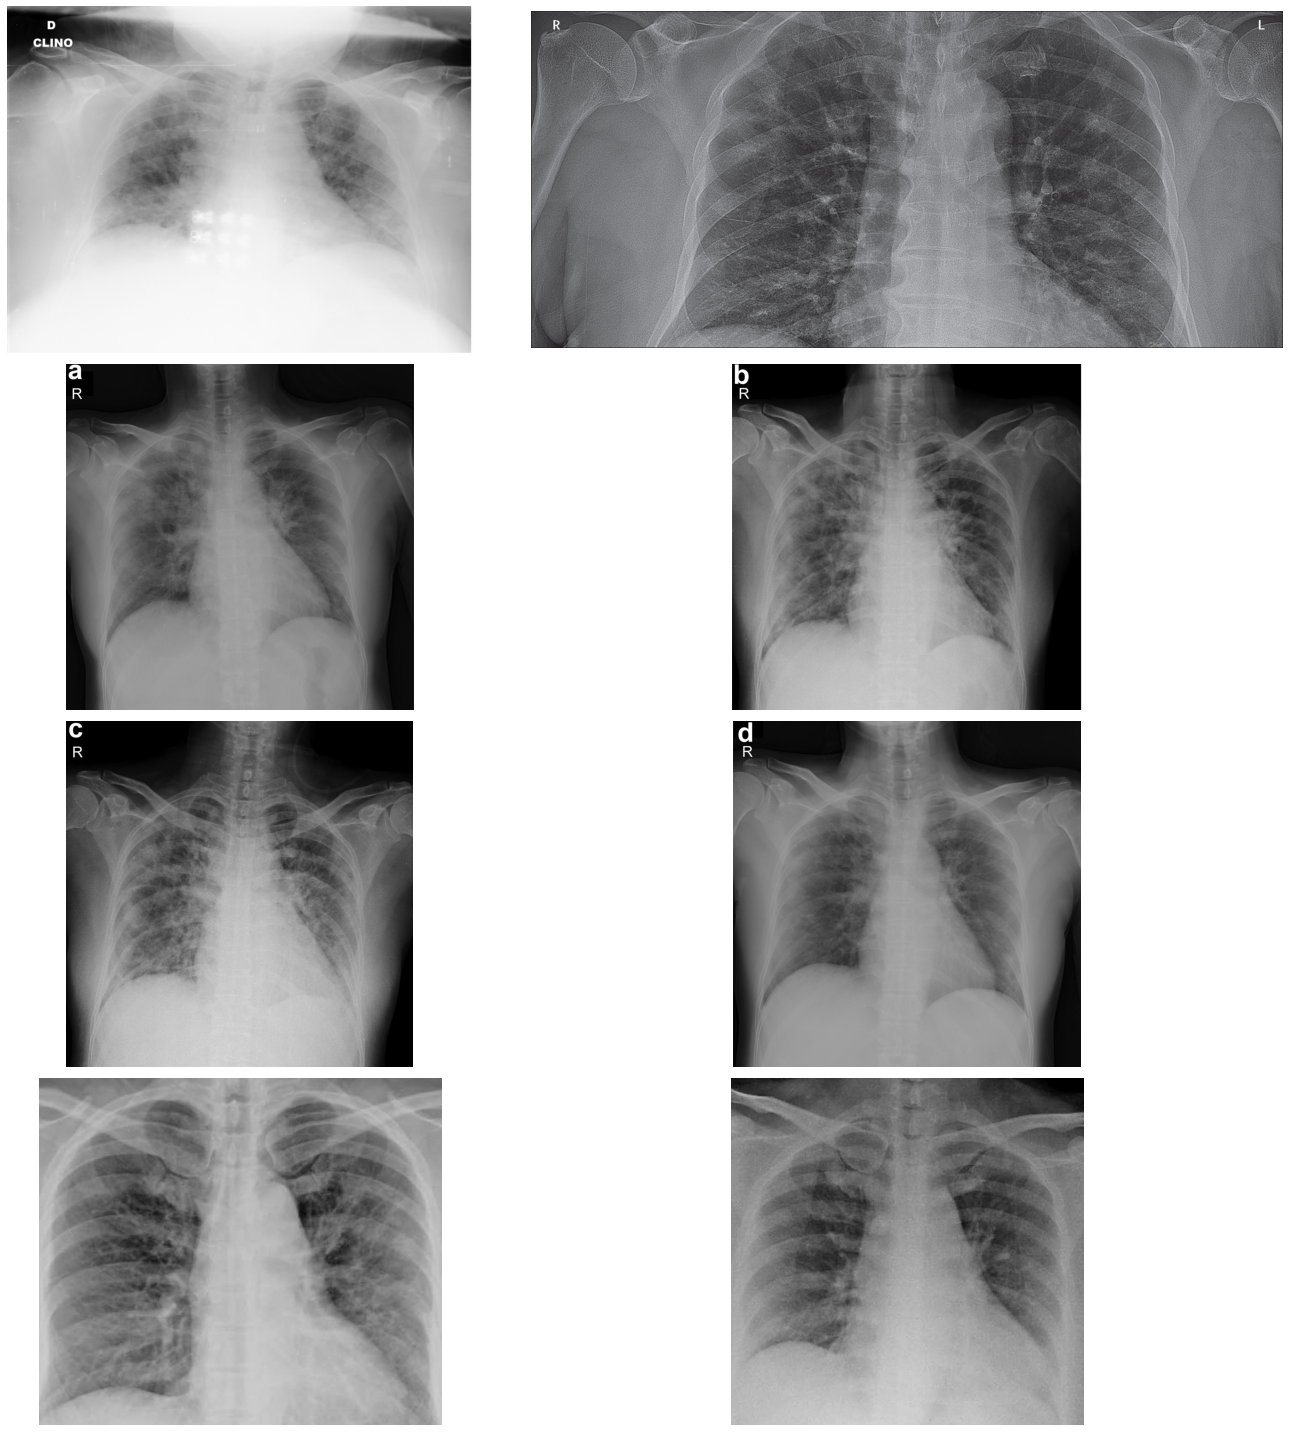

In [9]:
from PIL import Image
# Plot sample training images
plt.figure(figsize=(20, 20))

for iterator, filename in enumerate(sample_train_images):
    image = Image.open(filename)
    plt.subplot(4, 2, iterator+1)
    plt.axis('Off')
    plt.imshow(image)


plt.tight_layout()

In [10]:
def makelabel(label):
    if "virus" in label:
        return("Covid")
    else:
        return("Normal")

In [11]:
listing=[]
label=[]
for i in os.listdir(train_file):#[:100]:
    try:
        listing.append(convert_format(train_file+str(i)))
        label.append(makelabel(i))
    except:
        continue

In [12]:
X=np.array(listing)
X=X.reshape((-1,128,128,3))
y=np.array(label)
y=np.where(y=='Normal',0,1)
y=y.reshape((-1,1))

In [13]:
print(X.shape,y.shape)

(5295, 128, 128, 3) (5295, 1)


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=30)

In [15]:
datagen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
training_generator = datagen.flow(X_train, y_train, batch_size=200)
validation_generator=datagen.flow(X_test, y_test, batch_size=200)

In [16]:
X_test.shape

(1059, 128, 128, 3)

## RESNET

In [17]:
IMAGE_SIZE = [128, 128]
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False,pooling='avg')

In [18]:
for layer in resnet.layers:
    layer.trainable = False

In [19]:
x = tf.keras.layers.Flatten()(resnet.output)
prediction = tf.keras.layers.Dense(1, activation='sigmoid')(x) 
model = tf.keras.models.Model(inputs=resnet.input, outputs=prediction)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [20]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [21]:
history=model.fit_generator(training_generator,
                            steps_per_epoch=15,
                            epochs=40,
                            validation_data=validation_generator)

Epoch 1/40
15/15 [==============================] - 62s 4s/step - loss: 0.0000e+00 - accuracy: 0.4218 - val_loss: 0.0000e+00 - val_accuracy: 0.7422
Epoch 2/40
15/15 [==============================] - 53s 4s/step - loss: 0.0000e+00 - accuracy: 0.7441 - val_loss: 0.0000e+00 - val_accuracy: 0.7422
Epoch 3/40
15/15 [==============================] - 59s 4s/step - loss: 0.0000e+00 - accuracy: 0.7407 - val_loss: 0.0000e+00 - val_accuracy: 0.7422
Epoch 4/40
15/15 [==============================] - 78s 5s/step - loss: 0.0000e+00 - accuracy: 0.7391 - val_loss: 0.0000e+00 - val_accuracy: 0.7422
Epoch 5/40
15/15 [==============================] - 75s 5s/step - loss: 0.0000e+00 - accuracy: 0.7461 - val_loss: 0.0000e+00 - val_accuracy: 0.7422
Epoch 6/40
15/15 [==============================] - 73s 5s/step - loss: 0.0000e+00 - accuracy: 0.7453 - val_loss: 0.0000e+00 - val_accuracy: 0.7422
Epoch 7/40
15/15 [==============================] - 72s 5s/step - loss: 0.0000e+00 - accuracy: 0.7410 - val_loss

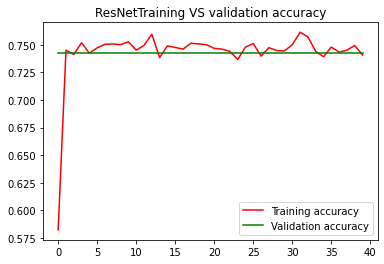

In [22]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('ResNetTraining VS validation accuracy')
plt.legend()
plt.show()

## BASE CNN

In [23]:
#A Sequential model is appropriate for a plain stack of layers 
#where each layer has exactly one input tensor and one output tensor
model=keras.models.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=X_train.shape[1:]))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(1,activation='sigmoid'))
model.summary()
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 124, 124, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        1

In [24]:
#training the model
history=model.fit_generator(training_generator,
                            steps_per_epoch=4236//200,
                            epochs=40,
                            validation_steps=1059//200,
                            validation_data=validation_generator)

Epoch 1/40
21/21 [==============================] - 208s 9s/step - loss: 0.0000e+00 - accuracy: 0.5921 - val_loss: 0.0000e+00 - val_accuracy: 0.2590
Epoch 2/40
21/21 [==============================] - 169s 8s/step - loss: 0.0000e+00 - accuracy: 0.6578 - val_loss: 0.0000e+00 - val_accuracy: 0.2590
Epoch 3/40
21/21 [==============================] - 169s 8s/step - loss: 0.0000e+00 - accuracy: 0.6753 - val_loss: 0.0000e+00 - val_accuracy: 0.2780
Epoch 4/40
21/21 [==============================] - 169s 8s/step - loss: 0.0000e+00 - accuracy: 0.7303 - val_loss: 0.0000e+00 - val_accuracy: 0.2590
Epoch 5/40
21/21 [==============================] - 168s 8s/step - loss: 0.0000e+00 - accuracy: 0.7249 - val_loss: 0.0000e+00 - val_accuracy: 0.2680
Epoch 6/40
21/21 [==============================] - 169s 8s/step - loss: 0.0000e+00 - accuracy: 0.7423 - val_loss: 0.0000e+00 - val_accuracy: 0.2630
Epoch 7/40
21/21 [==============================] - 169s 8s/step - loss: 0.0000e+00 - accuracy: 0.7616 - v

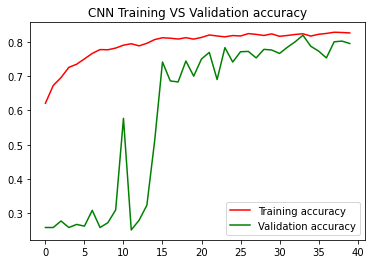

In [25]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('CNN Training VS Validation accuracy')
plt.legend()
plt.show()